In [1]:
#Importovanie potrebných knižních

import pandas as pan
#- Na manipuláciu a analýzu údajov.

import numpy as np
#- Na vedecké výpočty

import matplotlib.pyplot as plt
#- Na vykreslenie grafov

import seaborn as sns

from sklearn import preprocessing
#- Na preškálovanie dát

In [2]:
#Definícia triedy Adaline GD (ADAptive LInear NEuron with Gradient Descent)
class AdalineGD(object):
    
#Parametre:
        #rychlost_ucenia : float -> Je to miera učenia programu (od 0.0 do 1.0)->O akú hodnotu sa v jednej iterácii menia váhy
        #pocecet_iteracii : int -> Počet krokov prechádajucích cez súbor údajov
    
    def __init__(self, rychlost_ucenia,pocet_iteracii): #Inicializácia 
        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        
#Parametere:
        #X : {array-like}, shape = [n_samples, n_features] -> Tréningové vektory, kde n_samples je počet vzoriek a n_features je počet funkcií.
        #y : array-like, shape = [n_samples] -> Cieľové hodnoty.
        #w_ : 1d-array -> Váhy po dosadení.
        #errors_ : list -> Počet nesprávnych klasifikácií v každej epoche.

#Return:
        #self    
        
    def fit(self,X,y):                                           #Metóda procesu učenia
        self.w_ = np.zeros(1+X.shape[1])                         # w- sa naplní n-nulami v závislosti od vstupu X
        self.cost_=[]                                            # vytvorí sa pole cost_
     
        for i in range (self.pocet_iteracii):                    #Cyklus od 0 po pocet_iteracii na získanie výstupu a optimalizačného problému.
            output = self.net_input(X)       
            errors = (y-output)
            self.w_[1:] += self.rychlost_ucenia * X.T.dot(errors)
            self.w_[0] += self.rychlost_ucenia * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)    
            plt.plot(self.cost_)                                 #Vykreslenie grafu
        
        return self
    
    def net_input(self,X):                                       #Vypočíta net_input (čistý vstup)
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def linearna_aktivacia(self,X):                              #Vypočíta lineárnu aktiváciu
        return self.net_input(X)
    
    def predikcia(self,X):                                       #Vráti štítok triedy po kroku jednotky
        return np.where(self.linearna_aktivacia(X)>=0.0,1,-1)

In [3]:
CHAMP=pan.read_csv('riot_champion.csv',index_col=None)
CHAMP['tag1'], CHAMP['tag2'] = CHAMP['tags'].str.split(',',1).str
CHAMP = CHAMP[['name','key','tag1','info.attack', 'stats.attackdamage','stats.attackdamageperlevel', 'stats.attackspeed','stats.attackspeedperlevel','info.defense','stats.armor','stats.armorperlevel','stats.hp','stats.hpperlevel','info.difficulty']]
CHAMP=CHAMP[CHAMP.tag1.str.contains("Fighter") | CHAMP.tag1.str.contains("Assassin")]
CHAMP.tag1=CHAMP.tag1.str.replace("'","")
CHAMP.tag1=CHAMP.tag1.str.replace("[","")
CHAMP.tag1=CHAMP.tag1.str.replace("]","")
CHAMP=CHAMP.sort_values(by=['tag1'])
CHAMP

,name,key,tag1,info.attack,stats.attackdamage,stats.attackdamageperlevel,stats.attackspeed,stats.attackspeedperlevel,info.defense,stats.armor,stats.armorperlevel,stats.hp,stats.hpperlevel,info.difficulty
143,Zed,238,Assassin,9,63.000,3.400,0.651,3.30,2,32.000,3.50,584.00,85,7
89,Qiyana,246,Assassin,0,64.000,3.100,0.625,2.10,2,28.000,3.50,590.00,90,8
71,Master Yi,11,Assassin,10,66.000,3.000,0.679,2.00,4,33.000,3.00,598.56,92,4
61,LeBlanc,7,Assassin,1,54.880,3.500,0.625,1.40,4,21.880,3.50,528.00,92,9
95,Rengar,107,Assassin,7,68.000,3.000,0.667,3.00,4,34.000,3.00,585.00,90,8
57,Kha'Zix,121,Assassin,9,63.000,3.100,0.668,2.70,4,36.000,3.00,572.80,85,6
53,Katarina,55,Assassin,4,58.000,3.200,0.658,2.74,3,27.880,3.50,602.00,94,8
52,Kassadin,38,Assassin,3,58.852,3.900,0.640,3.70,5,19.000,2.80,576.00,90,8
102,Shaco,35,Assassin,8,63.000,3.000,0.694,3.00,4,30.000,3.50,587.00,89,9
80,Nidalee,76,Assassin,5,61.000,3.500,0.638,3.22,4,28.000,3.50,545.00,85,8


In [4]:
X=CHAMP.iloc[0:CHAMP.key.count(),[3,4,5,6,7,8,9,10,11,12,13]].values
X

array([[9.0000e+00, 6.3000e+01, 3.4000e+00, 6.5100e-01, 3.3000e+00,
        2.0000e+00, 3.2000e+01, 3.5000e+00, 5.8400e+02, 8.5000e+01,
        7.0000e+00],
       [0.0000e+00, 6.4000e+01, 3.1000e+00, 6.2500e-01, 2.1000e+00,
        2.0000e+00, 2.8000e+01, 3.5000e+00, 5.9000e+02, 9.0000e+01,
        8.0000e+00],
       [1.0000e+01, 6.6000e+01, 3.0000e+00, 6.7900e-01, 2.0000e+00,
        4.0000e+00, 3.3000e+01, 3.0000e+00, 5.9856e+02, 9.2000e+01,
        4.0000e+00],
       [1.0000e+00, 5.4880e+01, 3.5000e+00, 6.2500e-01, 1.4000e+00,
        4.0000e+00, 2.1880e+01, 3.5000e+00, 5.2800e+02, 9.2000e+01,
        9.0000e+00],
       [7.0000e+00, 6.8000e+01, 3.0000e+00, 6.6700e-01, 3.0000e+00,
        4.0000e+00, 3.4000e+01, 3.0000e+00, 5.8500e+02, 9.0000e+01,
        8.0000e+00],
       [9.0000e+00, 6.3000e+01, 3.1000e+00, 6.6800e-01, 2.7000e+00,
        4.0000e+00, 3.6000e+01, 3.0000e+00, 5.7280e+02, 8.5000e+01,
        6.0000e+00],
       [4.0000e+00, 5.8000e+01, 3.2000e+00, 6.5800e-01, 2.

In [5]:
#Po naplnení údajov tieto údaje zmení na hodnoty -1 alebo 1 v závislosti, či sa jedná o kosatca sibírskeho alebo o kosatca rôznofarebného


y=np.where(CHAMP.tag1.str.contains("Fighter"),-1,1)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

Grafická vizualizácia Fighterov a Assassinov na základe Attack damage a Attack damage per level


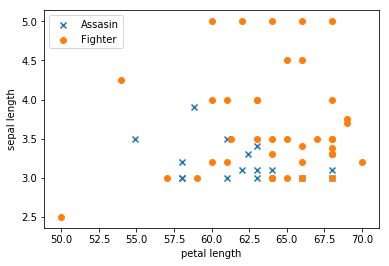

In [6]:
Pocet_prvej_Skupiny=CHAMP.tag1.str.count("Assassin").sum()

plt.scatter(X[0:Pocet_prvej_Skupiny,1],X[0:Pocet_prvej_Skupiny,2],marker='x',label='Assasin') 
plt.scatter(X[Pocet_prvej_Skupiny:CHAMP.key.count(),1],X[Pocet_prvej_Skupiny:CHAMP.key.count(),2],marker='o',label='Fighter')

plt.xlabel('petal length') #Pomenovanie X-ovej súradnicovej sústavy
plt.ylabel('sepal length') #Pomenovanie Y-ovej súradnicovej sústavy
plt.legend()    

print("Grafická vizualizácia Fighterov a Assassinov na základe Attack damage a Attack damage per level");

Grafická vizualizácia Fighterov a Assassinov na základe Attack speed a Attack speed per level


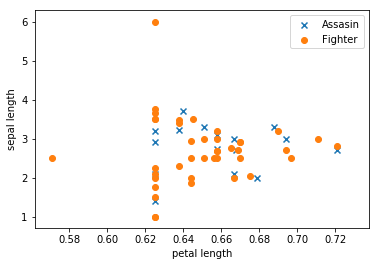

In [7]:
Pocet_prvej_Skupiny=CHAMP.tag1.str.count("Assassin").sum()

plt.scatter(X[0:Pocet_prvej_Skupiny,3],X[0:Pocet_prvej_Skupiny,4],marker='x',label='Assasin') 
plt.scatter(X[Pocet_prvej_Skupiny:CHAMP.key.count(),3],X[Pocet_prvej_Skupiny:CHAMP.key.count(),4],marker='o',label='Fighter')

plt.xlabel('petal length') #Pomenovanie X-ovej súradnicovej sústavy
plt.ylabel('sepal length') #Pomenovanie Y-ovej súradnicovej sústavy
plt.legend()    

print("Grafická vizualizácia Fighterov a Assassinov na základe Attack speed a Attack speed per level");

Grafická vizualizácia Fighterov a Assassinov na základe HP a HP per level


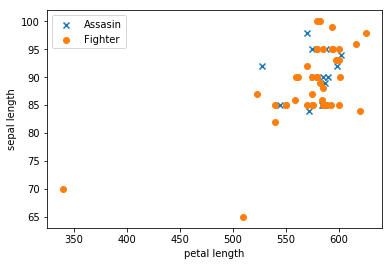

In [8]:
Pocet_prvej_Skupiny=CHAMP.tag1.str.count("Assassin").sum()

plt.scatter(X[0:Pocet_prvej_Skupiny,8],X[0:Pocet_prvej_Skupiny,9],marker='x',label='Assasin') 
plt.scatter(X[Pocet_prvej_Skupiny:CHAMP.key.count(),8],X[Pocet_prvej_Skupiny:CHAMP.key.count(),9],marker='o',label='Fighter')

plt.xlabel('petal length') #Pomenovanie X-ovej súradnicovej sústavy
plt.ylabel('sepal length') #Pomenovanie Y-ovej súradnicovej sústavy
plt.legend()    

print("Grafická vizualizácia Fighterov a Assassinov na základe HP a HP per level");

Úroveň obtiažnosti hrania pre prvú skupinu


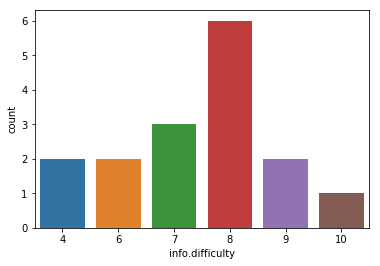

In [9]:
prva=CHAMP[CHAMP.tag1=="Assassin"]
sns.countplot(x=prva["info.difficulty"])
print("Úroveň obtiažnosti hrania pre prvú skupinu")

Úroveň obtiažnosťi hrania pre druhú skupinu


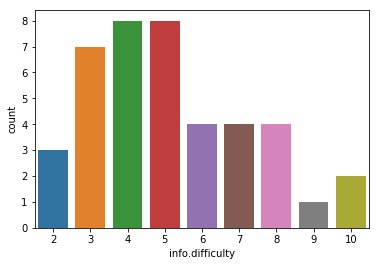

In [10]:
druha=CHAMP[CHAMP.tag1=="Fighter"]
sns.countplot(x=druha["info.difficulty"])
print("Úroveň obtiažnosťi hrania pre druhú skupinu")

Grafické porovnanie Attacku


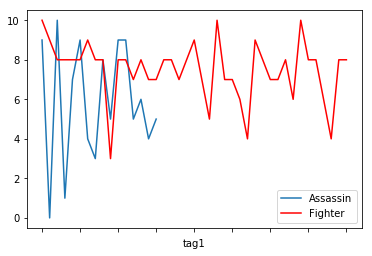

In [11]:
print("Grafické porovnanie Attacku");
ax = plt.gca()
prva.plot(kind='line',x='tag1',y='info.attack',ax=ax,)
druha.plot(kind='line',x='tag1',y='info.attack', color='red', ax=ax,)
ax.legend(["Assassin", "Fighter"]);
plt.show()

Grafické porovnanie Armoru


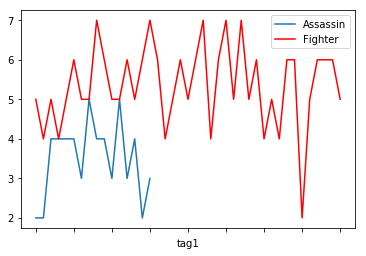

In [12]:
print("Grafické porovnanie Armoru");
ax = plt.gca()
prva.plot(kind='line',x='tag1',y='info.defense',ax=ax,)
druha.plot(kind='line',x='tag1',y='info.defense', color='red', ax=ax,)
ax.legend(["Assassin", "Fighter"]);
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: overflow encountered in square
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in add


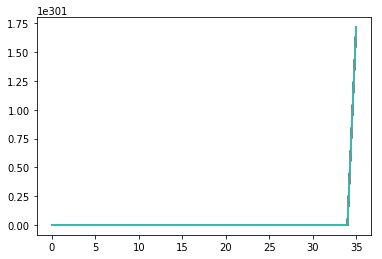

In [13]:
MojAdalineGD=AdalineGD(rychlost_ucenia=0.001,pocet_iteracii=100) #Zadefinovanie vlastnej premennej s triedou Adeline GD
MojAdalineGD.fit(X,y)  

In [14]:

X1=preprocessing.scale(X) #Funkcia scale() vydelí hodnoty z premennej X štandardnou odchýlkou a odčíta sa priemer pre každý dátový bod

print("Porovnanie prvých štyroch údajov z premennej X a X1")
print(X[0,0],X[0,1],X[1,0],X[1,1])
print(X1[0,0],X1[0,1],X1[1,0],X1[1,1])

Porovnanie prvých štyroch údajov z premennej X a X1
9.0 63.0 0.0 64.0
0.9201370918610849 -0.1206086051780496 -3.2944194092526344 0.12076104917026832


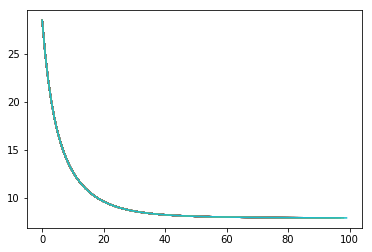

In [15]:
MojAdalineGD.fit(X1,y)     #Spustenie metódy fit() s hodnotami X1 (Preškálované hodnoty z premennej X) a y